In [1]:
%matplotlib inline
import os
import numpy as np
from astropy.cosmology import Planck15 as cosmo
from astrotog import functions as afunc
from astrotog import classes as aclasses
from astrotog import top_level_classes as atopclass
from mpi4py import MPI
import multiprocessing as mp
from itertools import repeat
import datetime
import time
from copy import copy, deepcopy
import pandas as pd
from scipy.integrate import simps
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
# Set seed for reproduceability
np.random.seed(12345)

/Users/cnsetzer/miniconda3/envs/astrotog/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/cnsetzer/miniconda3/envs/astrotog/lib/python3.5/site-packages/astrotog/functions.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/cnsetzer/miniconda3/envs/astrotog/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/cnsetzer/miniconda3/envs/astrotog/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/cnsetzer/miniconda3/envs/astrotog/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in 

In [2]:
check_transient= atopclass.rosswog_kilonova(mej=0.01,vej=0.05,kappa=1.0)
check_transient2= atopclass.rosswog_numerical_kilonova('/Users/cnsetzer/Documents/LSST/kilonova_seds/rosswog/NSNS/winds/SED_wind1.dat', singleSED=True)
check_transient3= atopclass.rosswog_numerical_kilonova('/Users/cnsetzer/Documents/LSST/pintoeastman_macronovae/RUN/mne-SED.dat', singleSED=True)
#check_transient4= atopclass.scolnic_kilonova('/Users/cnsetzer/Documents/LSST/kilonova_seds/scolnic/DECAMGemini_SED.txt')

[ 990.  980.  970.  960.  950.  940.  930.  920.  910.  900.  890.  880.
  870.  860.  850.  840.  830.  820.  810.  800.  790.  780.  770.  760.
  750.  740.  730.  720.  710.  700.  690.  680.  670.  660.  650.  640.
  630.  620.  610.  600.  590.  580.  570.  560.  550.  540.  530.  520.
  510.  500.  490.  480.  470.  460.  450.  440.  430.  420.  410.  400.
  390.  380.  370.  360.  350.  340.  330.  320.  310.  300.  290.  280.
  270.  260.  250.  240.  230.  220.  210.  200.  190.  180.  170.  160.
  150.  140.  130.  120.  110.  100.   90.   80.   70.   60.   50. 1000.
 1010. 1020. 1030. 1040.] [49010. 49020. 49030. 49040. 49050. 49060. 49070. 49080. 49090. 49100.
 49110. 49120. 49130. 49140. 49150. 49160. 49170. 49180. 49190. 49200.
 49210. 49220. 49230. 49240. 49250. 49260. 49270. 49280. 49290. 49300.
 49310. 49320. 49330. 49340. 49350. 49360. 49370. 49380. 49390. 49400.
 49410. 49420. 49430. 49440. 49450. 49460. 49470. 49480. 49490. 49500.
 49510. 49520. 49530. 49540. 49550.

ValueError: y must be strictly increasing

In [17]:
plot_flux = []
for i in range(len(check_transient.phase)):
    plot_flux.append(simps(check_transient.flux[i],check_transient.wave))
plot_flux2 = []
for i in range(len(check_transient2.phase)):
    plot_flux2.append(simps(check_transient2.flux[i],check_transient2.wave))
plot_flux3 = []
for i in range(len(check_transient3.phase)):
    plot_flux3.append(simps(check_transient3.flux[i],check_transient3.wave))
#plot_flux4 = []
#for i in range(len(check_transient4.phase)):
#    plot_flux4.append(simps(check_transient4.flux[i],check_transient4.wave))

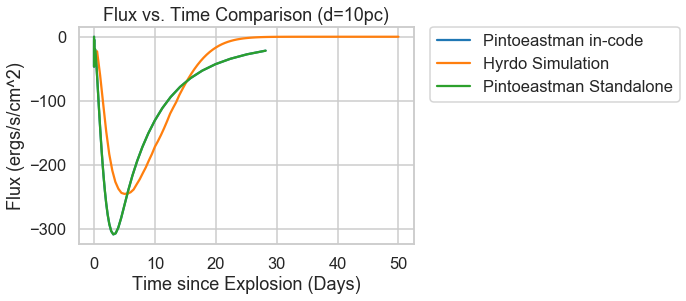

In [19]:
plt.plot(check_transient.phase, plot_flux)
plt.plot(check_transient2.phase, plot_flux2)
plt.plot(check_transient3.phase, plot_flux3)
#plt.plot(check_transient4.phase, plot_flux4)
plt.legend(['Pintoeastman in-code','Hyrdo Simulation','Pintoeastman Standalone'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Flux vs. Time Comparison (d=10pc)')
plt.xlabel('Time since Explosion (Days)')
plt.ylabel('Flux (ergs/s/cm^2)')
plt.show()

## Now compare other SEDS

### Comparing the NSNS winds

In [10]:
parameters = []
parameters.append(0.00001157) # start time (days)
parameters.append(50.0) # end time of integration (days)
parameters.append(0.01) # ejecta mass
parameters.append(0.05) # ejecta velocity
parameters.append(1.3) # exponent nuclear heating rate
parameters.append(0.25) # thermalization factor
parameters.append(1.0)  # DZ31 factor
parameters.append(1.0) # effective opacity
parameters.append(150.0) # starting temperature
parameters.append(False) # Boolean to read heating rates file
parameters.append('dummy string') # heating rates file string

PE_SEDs = atopclass.rosswog_kilonova(KNE_parameters=parameters)
Hydro_SEDs= atopclass.rosswog_numerical_kilonova('/Users/cnsetzer/Documents/LSST/kilonova_seds/rosswog/NSNS/winds/SED_wind1.dat', singleSED=True)

plot_flux = []
for i in range(len(PE_SEDs.phase)):
    plot_flux = simps(PE_SEDs.flux[i],PE_SEDs.wave)
plot_flux2 = []
for i in range(len(Hyrdo_SEDs.phase)):
    plot_flux2 = simps(Hydro_SEDs.flux[i],Hydro_SEDs.wave)

plt.plot(PE_SEDs.phase, plot_flux)
plt.plot(Hydro_SEDs.phase, plot_flux2)

plt.legend(['Pintoeastman in-code','Hyrdo Simulation'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Flux vs. Time Comparison (d=10pc) Wind1')
plt.xlabel('Time since Explosion (Days)')
plt.ylabel('Flux (ergs/s/cm^2)')
plt.axis([-0.2,20,0,6.75])
plt.show()

NameError: name 'simps' is not defined

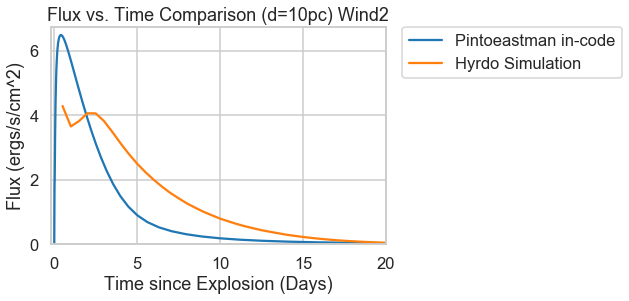

In [7]:
parameters = []
parameters.append(0.00001157) # start time (days)
parameters.append(50.0) # end time of integration (days)
parameters.append(0.01) # ejecta mass
parameters.append(0.05) # ejecta velocity
parameters.append(1.3) # exponent nuclear heating rate
parameters.append(0.25) # thermalization factor
parameters.append(1.0)  # DZ31 factor
parameters.append(1.0) # effective opacity
parameters.append(150.0) # starting temperature
parameters.append(False) # Boolean to read heating rates file
parameters.append('dummy string') # heating rates file string

PE_SEDs = atopclass.rosswog_kilonova(KNE_parameters=parameters)
Hydro_SEDs= atopclass.rosswog_numerical_kilonova('/Users/cnsetzer/Documents/LSST/kilonova_seds/rosswog/NSNS/winds/SED_wind2.dat', singleSED=True)

plot_flux = []
for i in range(len(PE_SEDs.phase)):
    plot_flux = simps(PE_SEDs.flux[i],PE_SEDs.wave)
plot_flux2 = []
for i in range(len(Hyrdo_SEDs.phase)):
    plot_flux2 = simps(Hydro_SEDs.flux[i],Hydro_SEDs.wave)

plt.plot(PE_SEDs.phase, plot_flux)
plt.plot(Hydro_SEDs.phase, plot_flux2)

plt.legend(['Pintoeastman in-code','Hyrdo Simulation'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Flux vs. Time Comparison (d=10pc) Wind2')
plt.xlabel('Time since Explosion (Days)')
plt.ylabel('Flux (ergs/s/cm^2)')
plt.axis([-0.2,20,0,6.75])
plt.show()

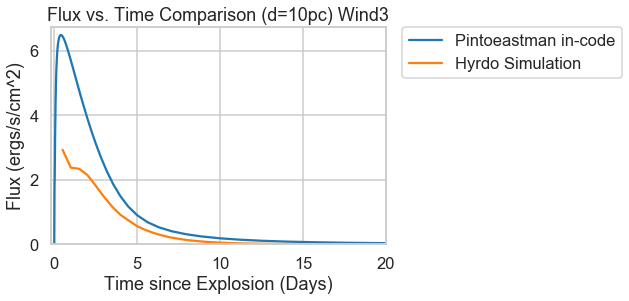

In [8]:
parameters = []
parameters.append(0.00001157) # start time (days)
parameters.append(50.0) # end time of integration (days)
parameters.append(0.01) # ejecta mass
parameters.append(0.05) # ejecta velocity
parameters.append(1.3) # exponent nuclear heating rate
parameters.append(0.25) # thermalization factor
parameters.append(1.0)  # DZ31 factor
parameters.append(1.0) # effective opacity
parameters.append(150.0) # starting temperature
parameters.append(False) # Boolean to read heating rates file
parameters.append('dummy string') # heating rates file string

PE_SEDs = atopclass.rosswog_kilonova(KNE_parameters=parameters)
Hydro_SEDs= atopclass.rosswog_numerical_kilonova('/Users/cnsetzer/Documents/LSST/kilonova_seds/rosswog/NSNS/winds/SED_wind1.dat', singleSED=True)

plot_flux = []
for i in range(len(PE_SEDs.phase)):
    plot_flux = simps(PE_SEDs.flux[i],PE_SEDs.wave)
plot_flux2 = []
for i in range(len(Hyrdo_SEDs.phase)):
    plot_flux2 = simps(Hydro_SEDs.flux[i],Hydro_SEDs.wave)

plt.plot(PE_SEDs.phase, plot_flux)
plt.plot(Hydro_SEDs.phase, plot_flux2)

plt.legend(['Pintoeastman in-code','Hyrdo Simulation'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Flux vs. Time Comparison (d=10pc) Wind3')
plt.xlabel('Time since Explosion (Days)')
plt.ylabel('Flux (ergs/s/cm^2)')
plt.axis([-0.2,20,0,6.75])
plt.show()

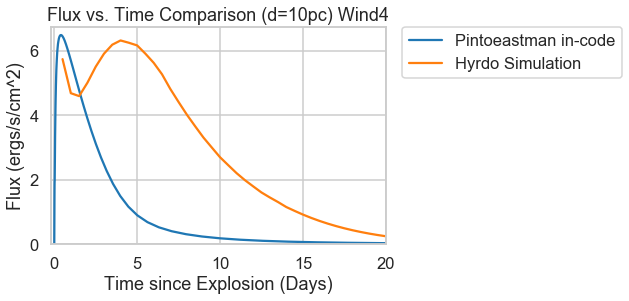

In [9]:
parameters = []
parameters.append(0.00001157) # start time (days)
parameters.append(50.0) # end time of integration (days)
parameters.append(0.05) # ejecta mass
parameters.append(0.05) # ejecta velocity
parameters.append(1.3) # exponent nuclear heating rate
parameters.append(0.25) # thermalization factor
parameters.append(1.0)  # DZ31 factor
parameters.append(1.0) # effective opacity
parameters.append(150.0) # starting temperature
parameters.append(False) # Boolean to read heating rates file
parameters.append('dummy string') # heating rates file string

PE_SEDs = atopclass.rosswog_kilonova(KNE_parameters=parameters)
Hydro_SEDs= atopclass.rosswog_numerical_kilonova('/Users/cnsetzer/Documents/LSST/kilonova_seds/rosswog/NSNS/winds/SED_wind1.dat', singleSED=True)

plot_flux = []
for i in range(len(PE_SEDs.phase)):
    plot_flux = simps(PE_SEDs.flux[i],PE_SEDs.wave)
plot_flux2 = []
for i in range(len(Hyrdo_SEDs.phase)):
    plot_flux2 = simps(Hydro_SEDs.flux[i],Hydro_SEDs.wave)

plt.plot(PE_SEDs.phase, plot_flux)
plt.plot(Hydro_SEDs.phase, plot_flux2)
plt.legend(['Pintoeastman in-code','Hyrdo Simulation'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Flux vs. Time Comparison (d=10pc) Wind4')
plt.xlabel('Time since Explosion (Days)')
plt.ylabel('Flux (ergs/s/cm^2)')
plt.axis([-0.2,20,0,6.75])
plt.show()

In [ ]:
parameters = []
parameters.append(0.00001157) # start time (days)
parameters.append(50.0) # end time of integration (days)
parameters.append(0.01) # ejecta mass
parameters.append(0.05) # ejecta velocity
parameters.append(1.3) # exponent nuclear heating rate
parameters.append(0.25) # thermalization factor
parameters.append(1.0)  # DZ31 factor
parameters.append(1.0) # effective opacity
parameters.append(150.0) # starting temperature
parameters.append(False) # Boolean to read heating rates file
parameters.append('dummy string') # heating rates file string

PE_SEDs = atopclass.rosswog_kilonova(KNE_parameters=parameters)
Hydro_SEDs= atopclass.rosswog_numerical_kilonova('/Users/cnsetzer/Documents/LSST/kilonova_seds/rosswog/NSNS/winds/SED_wind1.dat', singleSED=True)

plot_flux = []
for i in range(len(PE_SEDs.phase)):
    plot_flux = simps(PE_SEDs.flux[i],PE_SEDs.wave)
plot_flux2 = []
for i in range(len(Hyrdo_SEDs.phase)):
    plot_flux2 = simps(Hydro_SEDs.flux[i],Hydro_SEDs.wave)

plt.plot(PE_SEDs.phase, plot_flux)
plt.plot(Hydro_SEDs.phase, plot_flux2)

plt.legend(['Pintoeastman in-code','Hyrdo Simulation'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Flux vs. Time Comparison (d=10pc) Wind5')
plt.xlabel('Time since Explosion (Days)')
plt.ylabel('Flux (ergs/s/cm^2)')
plt.axis([-0.2,20,0,6.75])
plt.show()